#Data cleaning

In [ ]:
import pandas as pd

df = pd.read_csv('gujarat_data.csv')

1)Check for missing values

In [ ]:
dataset_info = {

    "Missing Values": df.isnull().sum()
}

dataset_info

{'Missing Values': datetime        0
 id              0
 name            0
 longitude       0
 latitude        0
 live            0
 cityid          0
 stateid         0
 PM2.5        1380
 PM10         1394
 NO2          2163
 NH3          6307
 SO2          2441
 CO           1410
 OZONE        1569
 dtype: int64}

Drop rows with missing values

In [ ]:
df = df.dropna()

2) Check for duplicate rows

In [ ]:
dataset_info = {

    "duplicate_rows" :df.duplicated().sum()
}

dataset_info

{'duplicate_rows': 0}

Drops duplicate rows

In [ ]:
df.drop_duplicates()

,datetime,id,name,longitude,latitude,live,cityid,stateid,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE
0,"Wednesday, 15 Jan 2020, 12:00 AM",site_5067,"Phase-4 GIDC, Vatva - GPCB",72.643500,22.969611,True,Vatva,Gujarat,79.0,96.0,16.0,8.0,2.0,72.0,6.0
1,"Wednesday, 15 Jan 2020, 01:00 AM",site_5067,"Phase-4 GIDC, Vatva - GPCB",72.643500,22.969611,True,Vatva,Gujarat,69.0,92.0,11.0,7.0,20.0,67.0,6.0
2,"Wednesday, 15 Jan 2020, 02:00 AM",site_5067,"Phase-4 GIDC, Vatva - GPCB",72.643500,22.969611,True,Vatva,Gujarat,61.0,82.0,12.0,7.0,22.0,61.0,7.0
3,"Wednesday, 15 Jan 2020, 03:00 AM",site_5067,"Phase-4 GIDC, Vatva - GPCB",72.643500,22.969611,True,Vatva,Gujarat,56.0,72.0,9.0,7.0,11.0,59.0,7.0
4,"Wednesday, 15 Jan 2020, 04:00 AM",site_5067,"Phase-4 GIDC, Vatva - GPCB",72.643500,22.969611,True,Vatva,Gujarat,56.0,61.0,9.0,6.0,2.0,67.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16330,"Sunday, 10 May 2020, 07:00 PM",site_5066,"Sector-10, Gandhinagar - GPCB",72.654328,23.221714,True,Gandhinagar,Gujarat,38.0,49.0,2.0,3.0,9.0,30.0,48.0
16331,"Sunday, 10 May 2020, 08:00 PM",site_5066,"Sector-10, Gandhinagar - GPCB",72.654328,23.221714,True,Gandhinagar,Gujarat,29.0,48.0,3.0,3.0,8.0,33.0,40.0
16332,"Sunday, 10 May 2020, 09:00 PM",site_5066,"Sector-10, Gandhinagar - GPCB",72.654328,23.221714,True,Gandhinagar,Gujarat,37.0,48.0,2.0,3.0,8.0,34.0,18.0
16333,"Sunday, 10 May 2020, 10:00 PM",site_5066,"Sector-10, Gandhinagar - GPCB",72.654328,23.221714,True,Gandhinagar,Gujarat,38.0,51.0,2.0,3.0,9.0,33.0,14.0


improve date colum


In [ ]:
from datetime import datetime
def lookup(s):
    dates = {date:pd.to_datetime(date) for date in s.unique()}
    return s.map(dates)



In [ ]:
df['datetime'] = lookup(df['datetime'])

In [ ]:
df.set_index('datetime', inplace=True)

In [ ]:
df.head()

,id,name,longitude,latitude,live,cityid,stateid,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE
datetime,,,,,,,,,,,,,,
2020-01-15 00:00:00,site_5067,"Phase-4 GIDC, Vatva - GPCB",72.6435,22.969611,True,Vatva,Gujarat,79.0,96.0,16.0,8.0,2.0,72.0,6.0
2020-01-15 01:00:00,site_5067,"Phase-4 GIDC, Vatva - GPCB",72.6435,22.969611,True,Vatva,Gujarat,69.0,92.0,11.0,7.0,20.0,67.0,6.0
2020-01-15 02:00:00,site_5067,"Phase-4 GIDC, Vatva - GPCB",72.6435,22.969611,True,Vatva,Gujarat,61.0,82.0,12.0,7.0,22.0,61.0,7.0
2020-01-15 03:00:00,site_5067,"Phase-4 GIDC, Vatva - GPCB",72.6435,22.969611,True,Vatva,Gujarat,56.0,72.0,9.0,7.0,11.0,59.0,7.0
2020-01-15 04:00:00,site_5067,"Phase-4 GIDC, Vatva - GPCB",72.6435,22.969611,True,Vatva,Gujarat,56.0,61.0,9.0,6.0,2.0,67.0,6.0


# Exploratory Data Analysis

##Descriptive Statistics

In [ ]:
numerical_stats = df.describe()
# Print the descriptive statistics
print("Descriptive Statistics for Numerical Columns:")
print(numerical_stats)



Descriptive Statistics for Numerical Columns:
          longitude      latitude         PM2.5          PM10           NO2  \
count  16335.000000  16335.000000  14955.000000  14941.000000  14172.000000   
mean      72.760913     22.242128    102.587028    103.353390     26.350621   
std        0.166915      1.097814     85.129136     55.461456     30.520562   
min       72.591912     20.362421      5.000000     16.000000      0.000000   
25%       72.643500     21.613267     47.000000     67.000000      7.000000   
50%       72.654328     22.969611     71.000000     93.000000     16.000000   
75%       72.918013     23.002657    122.000000    124.000000     33.000000   
max       73.010555     23.221714    500.000000    500.000000    407.000000   

                NH3           SO2            CO         OZONE  
count  10028.000000  13894.000000  14925.000000  14766.000000  
mean       4.883626     28.008133     46.283752     28.726331  
std        4.400391     28.315492     26.902966   

In [ ]:
# Descriptive statistics for categorical columns
categorical_stats = df.describe(include=['object'])
print("\nDescriptive Statistics for Categorical Columns:")
print(categorical_stats)



Descriptive Statistics for Categorical Columns:
                                datetime        id  \
count                              16335     16335   
unique                              3359         5   
top     Wednesday, 15 Jan 2020, 12:00 AM  site_308   
freq                                   5      3358   

                               name     cityid  stateid  
count                         16335      16335    16335  
unique                            5          5        1  
top     Maninagar, Ahmedabad - GPCB  Ahmedabad  Gujarat  
freq                           3358       3358    16335  


##Data Visualization

Pollution before lockdown and after lockdown,

---


lockdown in india started at 25 March 2020




<ipython-input-14-ed957a13c281>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['datetime'])


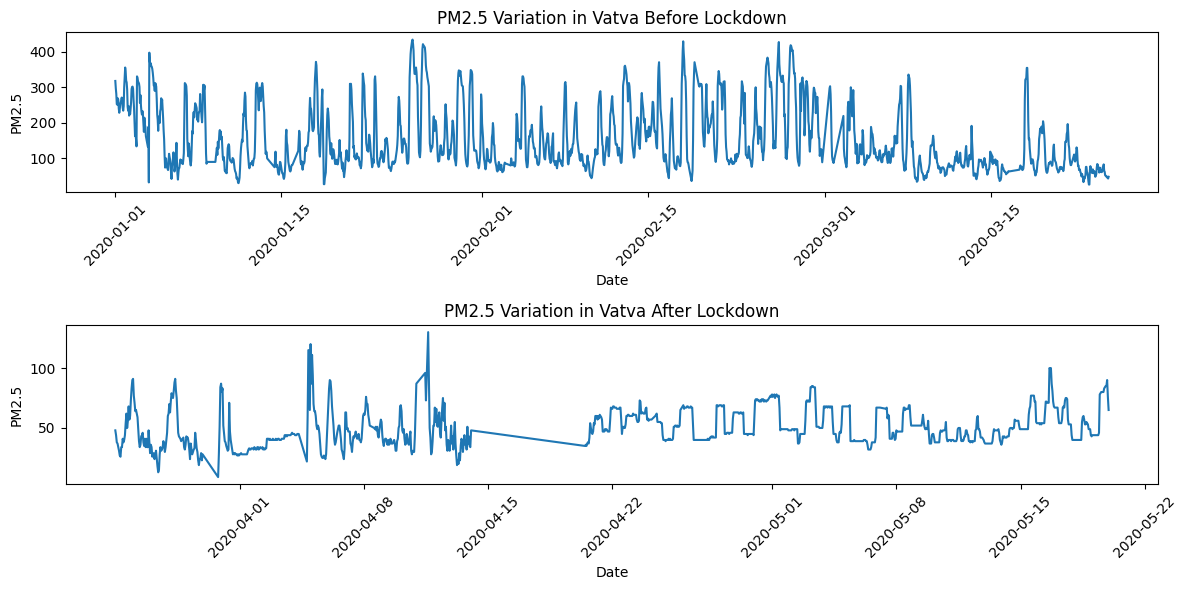

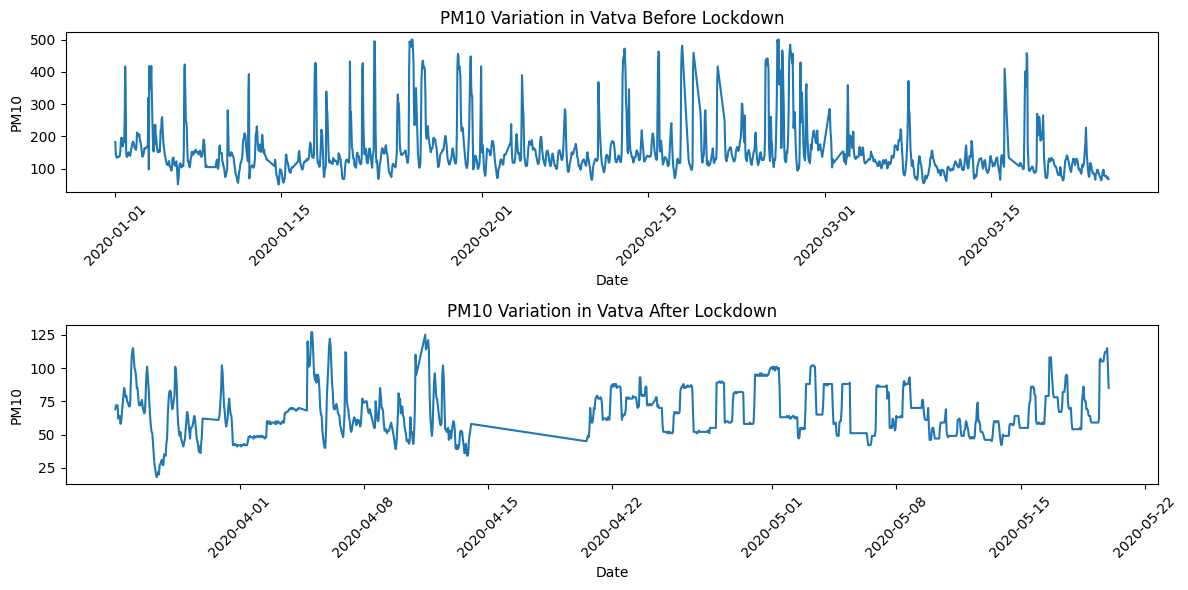

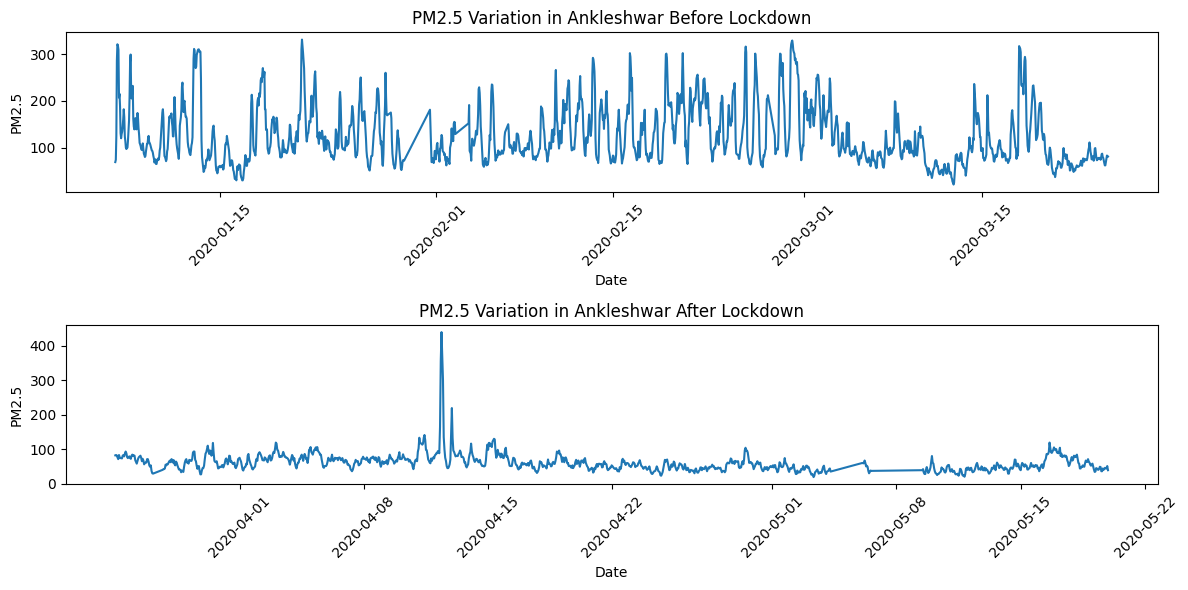

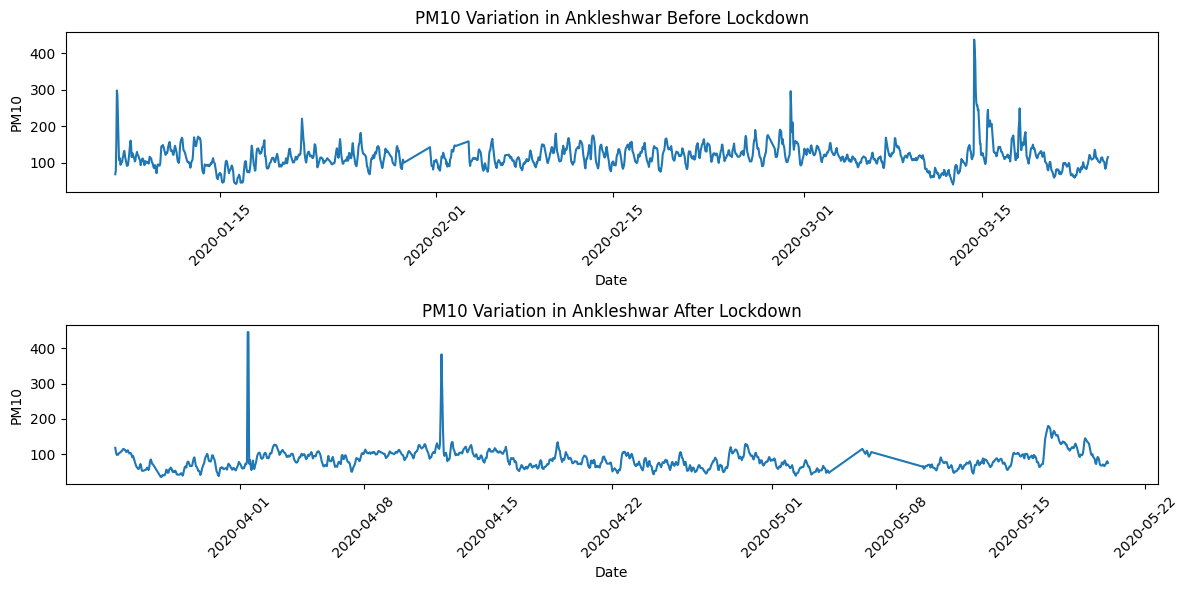

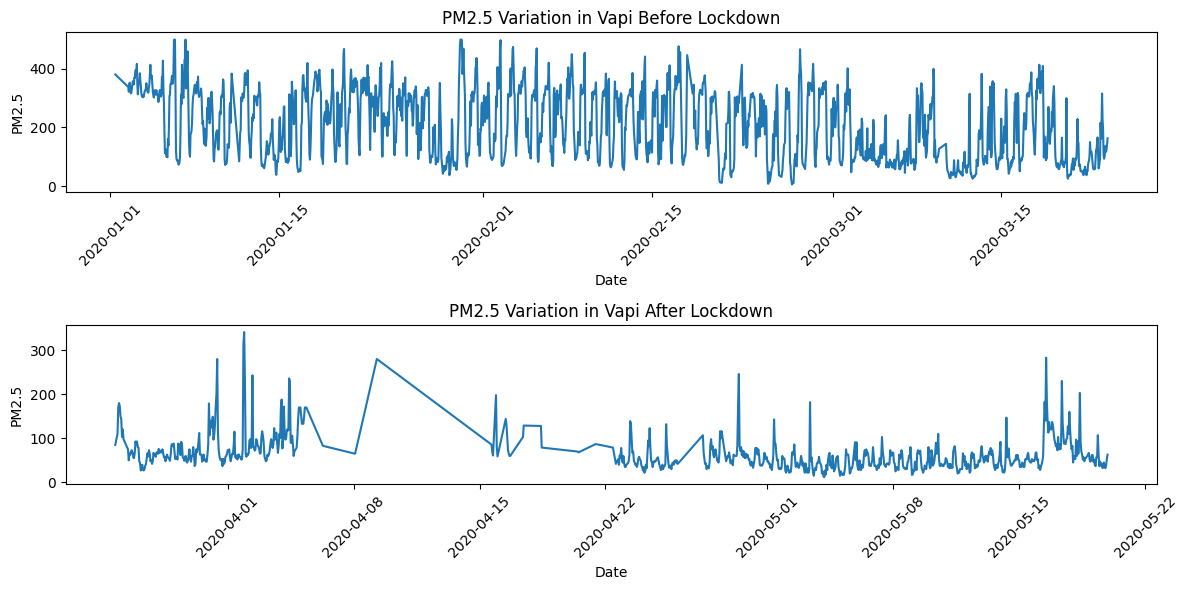

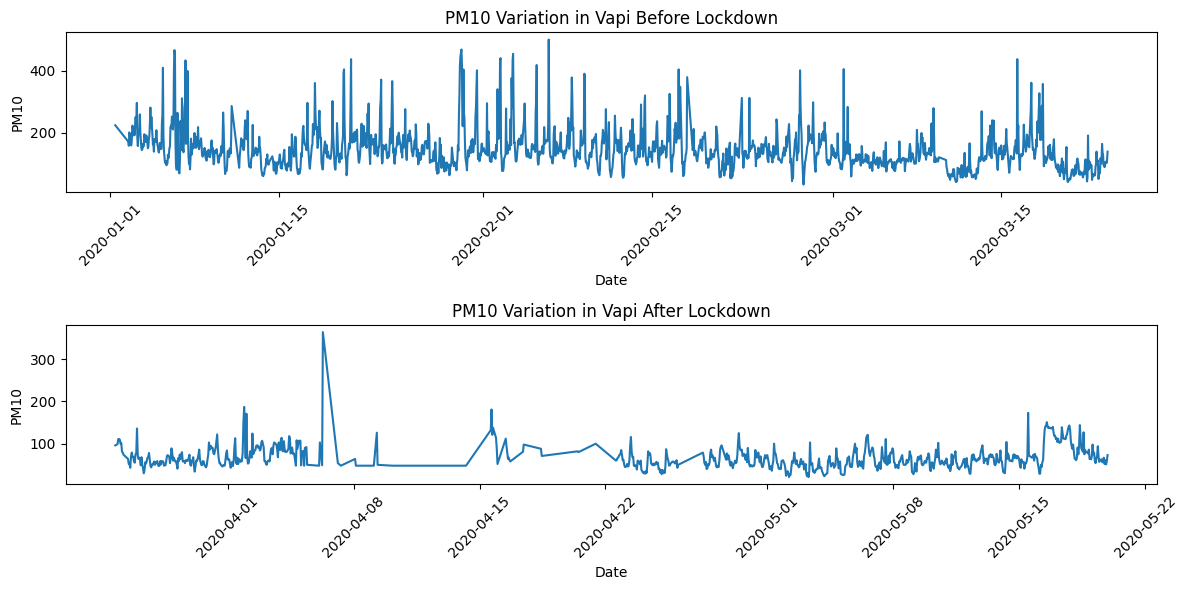

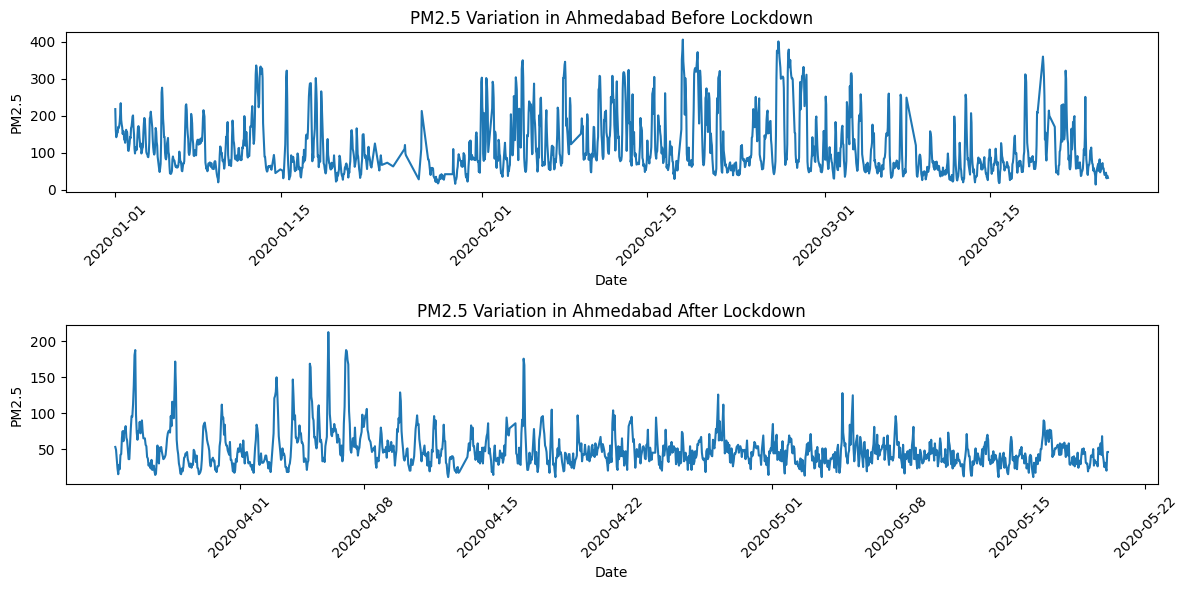

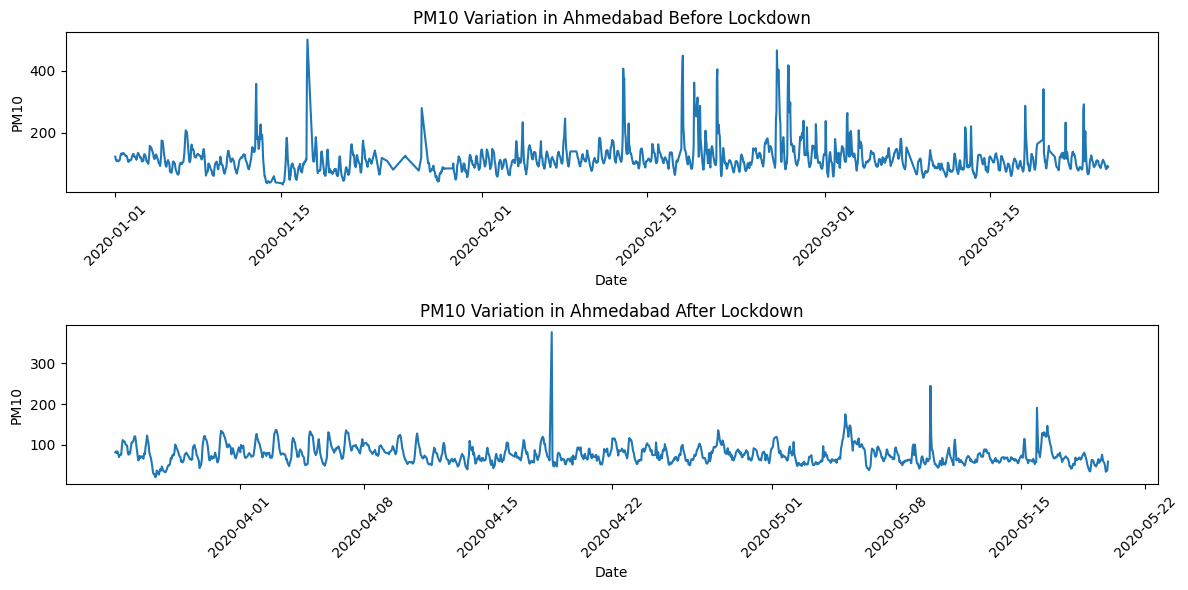

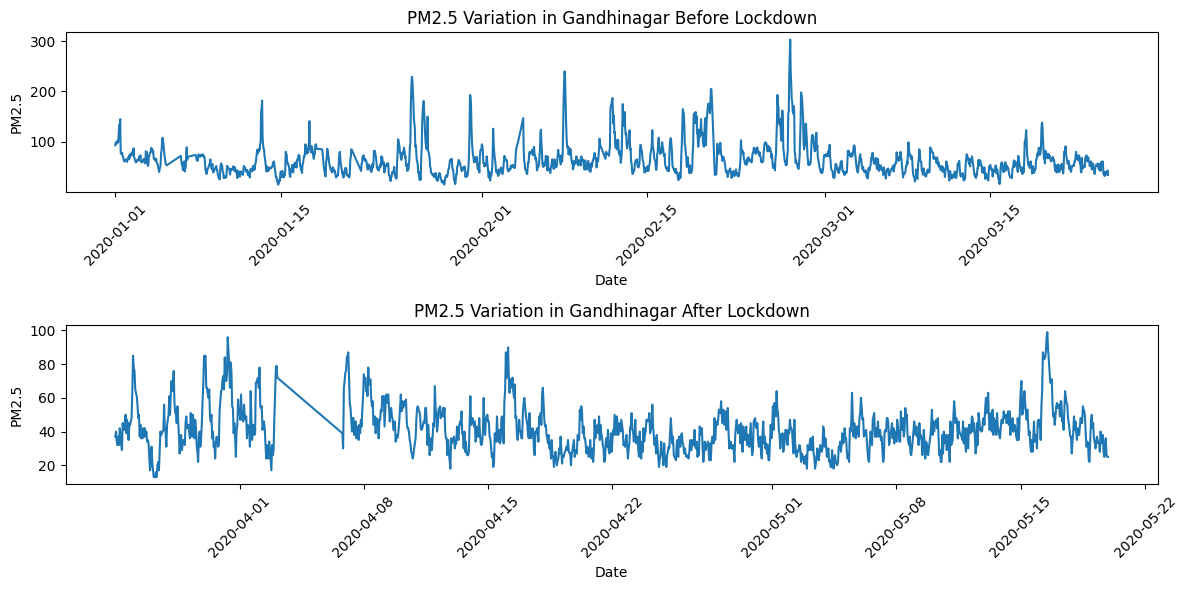

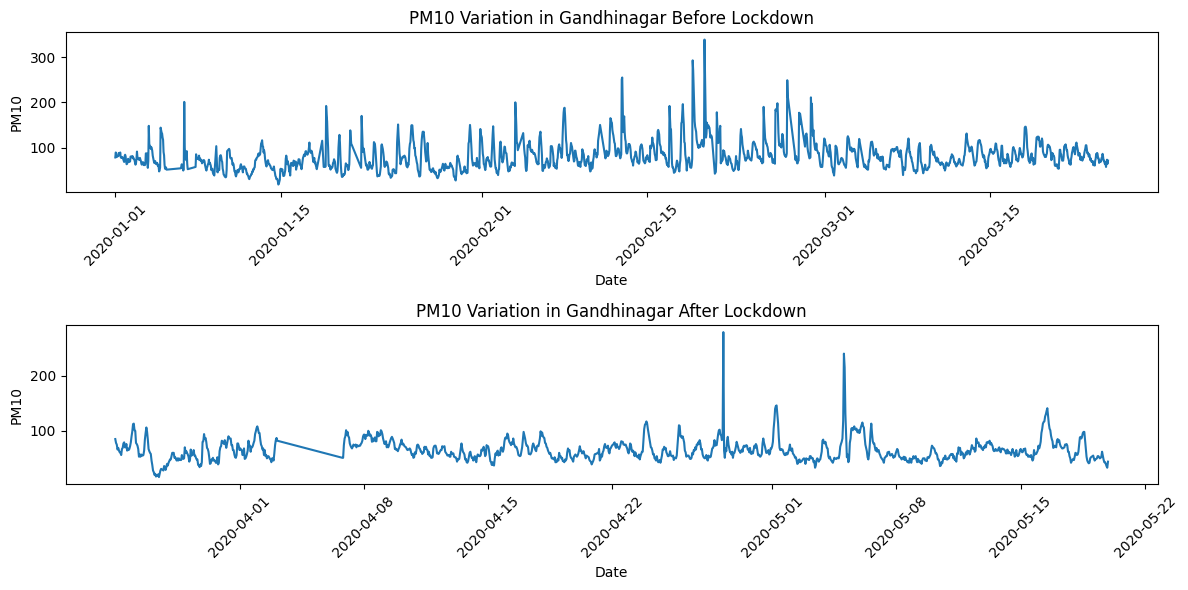

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'datetime' column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Split the data into two periods: before and after the lockdown date
before_lockdown = df[df['datetime'] < '2020-03-25']
after_lockdown = df[df['datetime'] >= '2020-03-25']

# Get unique cities from the data
cities = df['cityid'].unique()

# Plotting pollution levels for each city
for city in cities:
    city_data_before = before_lockdown[before_lockdown['cityid'] == city]
    city_data_after = after_lockdown[after_lockdown['cityid'] == city]

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    sns.lineplot(x='datetime', y='PM2.5', data=city_data_before)
    plt.title(f'PM2.5 Variation in {city} Before Lockdown')
    plt.xlabel('Date')
    plt.ylabel('PM2.5')
    plt.xticks(rotation=45)

    plt.subplot(2, 1, 2)
    sns.lineplot(x='datetime', y='PM2.5', data=city_data_after)
    plt.title(f'PM2.5 Variation in {city} After Lockdown')
    plt.xlabel('Date')
    plt.ylabel('PM2.5')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    sns.lineplot(x='datetime', y='PM10', data=city_data_before)
    plt.title(f'PM10 Variation in {city} Before Lockdown')
    plt.xlabel('Date')
    plt.ylabel('PM10')
    plt.xticks(rotation=45)

    plt.subplot(2, 1, 2)
    sns.lineplot(x='datetime', y='PM10', data=city_data_after)
    plt.title(f'PM10 Variation in {city} After Lockdown')
    plt.xlabel('Date')
    plt.ylabel('PM10')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


In [ ]:
df['lockdown'] = 'before_lockdown'
df.loc['2020-03-25':, 'lockdown'] = 'after_lockdown'

beforeLockdown = df.loc[df['lockdown'] == 'before_lockdown', ['PM2.5','PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE']].mean().reset_index()
beforeLockdown['lockdown'] = 'before'
beforeLockdown.rename({'index' : 'pollutant', 0 :'value' }, axis=1, inplace=True)
beforeLockdown

afterLockdown = df.loc[df['lockdown'] == 'after_lockdown', ['PM2.5','PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE']].mean().reset_index()
afterLockdown['lockdown'] = 'after'
afterLockdown.rename({'index' : 'pollutant', 0 :'value' }, axis=1, inplace=True)
afterLockdown

lockdownDf = pd.concat([beforeLockdown, afterLockdown], ignore_index=True)
lockdownDf

,pollutant,value,lockdown
0,PM2.5,152.097574,before
1,PM10,153.699571,before
2,NO2,53.161438,before
3,NH3,5.786315,before
4,SO2,31.677313,before
5,CO,53.256900,before
6,OZONE,19.292147,before
7,PM2.5,95.398729,after
8,PM10,96.177028,after
9,NO2,22.566149,after


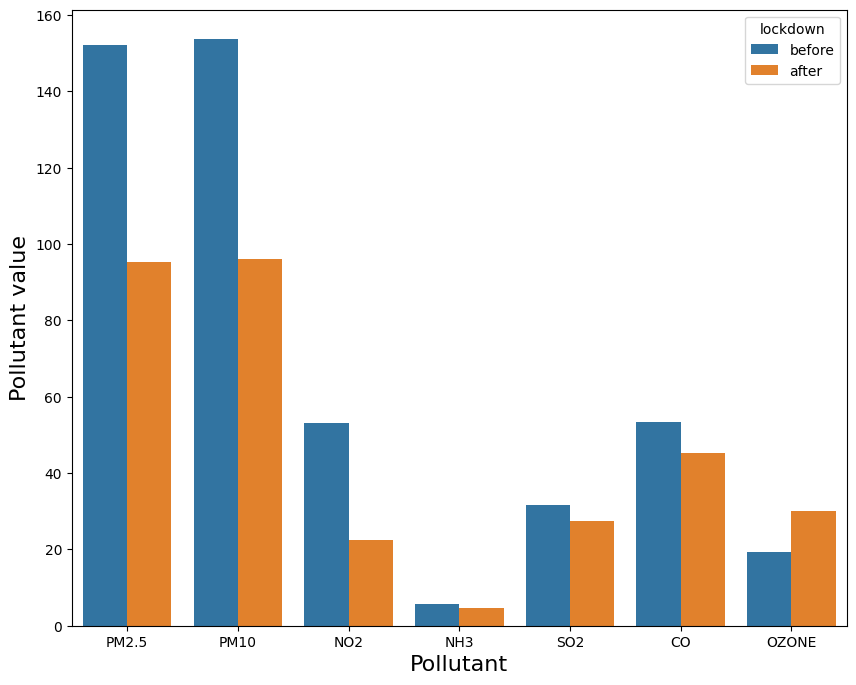

In [ ]:
fig = plt.figure(figsize=[10,8])
ax = fig.subplots()
sns.barplot(x='pollutant', y='value',  hue='lockdown', data=lockdownDf, ax=ax)
ax.set_xlabel('Pollutant', fontsize=16)
ax.set_ylabel('Pollutant value', fontsize=16)
plt.show()

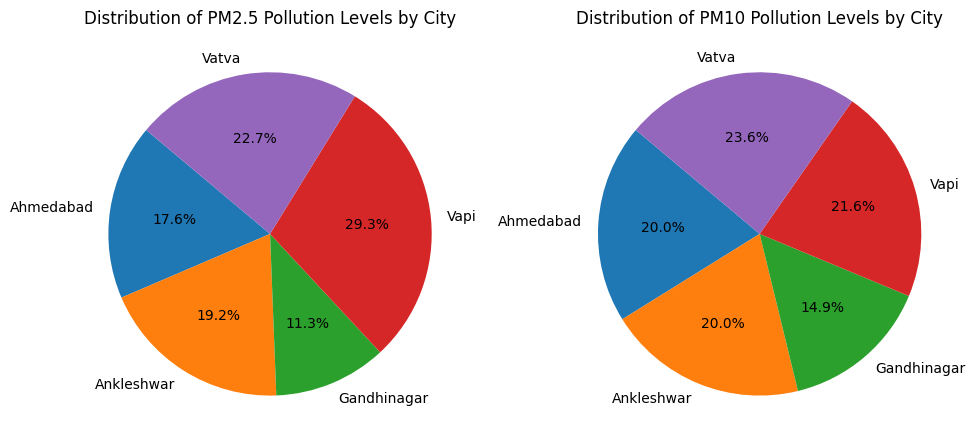

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is already loaded into a DataFrame named 'df'

# Group data by city and calculate total PM2.5 and PM10 pollution levels for each city
city_pollution = df.groupby('cityid')[['PM2.5', 'PM10']].sum()

# Plot pie chart for PM2.5 pollution levels
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(city_pollution['PM2.5'], labels=city_pollution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of PM2.5 Pollution Levels by City')

# Plot pie chart for PM10 pollution levels
plt.subplot(1, 2, 2)
plt.pie(city_pollution['PM10'], labels=city_pollution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of PM10 Pollution Levels by City')

plt.tight_layout()
plt.show()


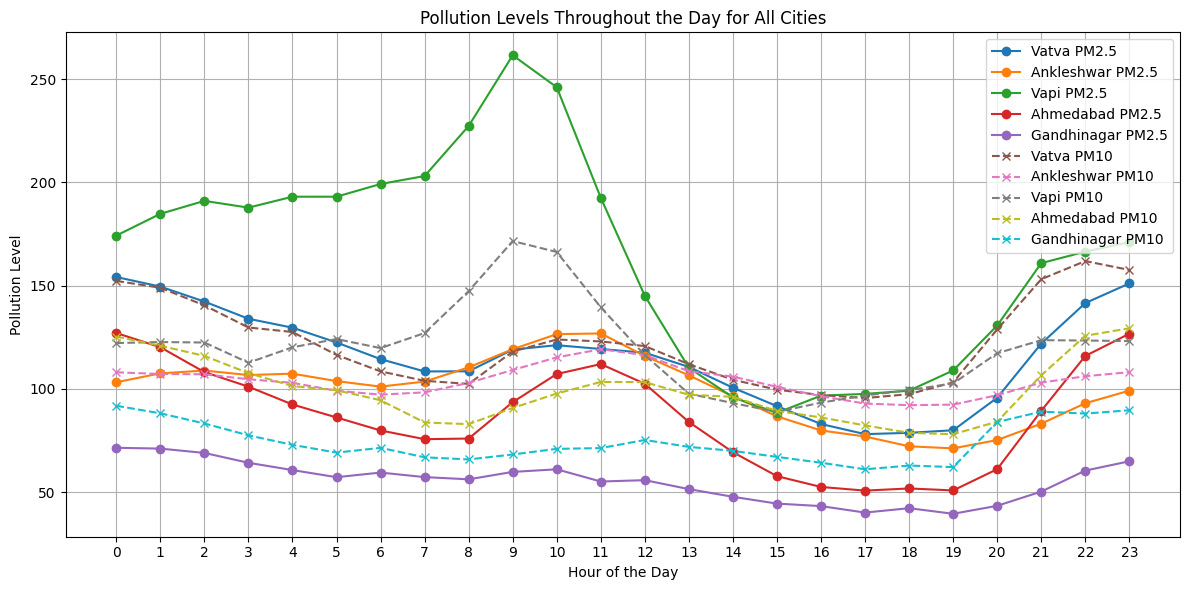

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded into a DataFrame named 'df'

# Convert the 'datetime' column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract hour from datetime
df['hour'] = df['datetime'].dt.hour

# Group data by city and hour and calculate the mean pollution levels
city_hourly_mean = df.groupby(['cityid', 'hour'])[['PM2.5', 'PM10']].mean().reset_index()

# Plotting pollution levels throughout the day for all cities
plt.figure(figsize=(12, 6))

# Plotting PM2.5 for each city
for city in df['cityid'].unique():
    city_data = city_hourly_mean[city_hourly_mean['cityid'] == city]
    plt.plot(city_data['hour'], city_data['PM2.5'], label=city + ' PM2.5', marker='o')

# Plotting PM10 for each city
for city in df['cityid'].unique():
    city_data = city_hourly_mean[city_hourly_mean['cityid'] == city]
    plt.plot(city_data['hour'], city_data['PM10'], label=city + ' PM10', linestyle='--', marker='x')

plt.title('Pollution Levels Throughout the Day for All Cities')
plt.xlabel('Hour of the Day')
plt.ylabel('Pollution Level')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# #Modeling

This code snippet demonstrates the application of a simple linear regression model to predict OZONE levels based on various air quality parameters such as PM2.5, PM10, NO2, NH3, SO2, and CO.

How it Works:

**Data Loading** : The dataset containing information about air quality parameters and OZONE levels is loaded into the notebook.

**Feature Selection**: The features selected for predicting OZONE levels are PM2.5, PM10, NO2, NH3, SO2, and CO. These features are chosen as they are known to contribute significantly to OZONE levels in the atmosphere.

**Model Training **: The data is split into training and testing sets to train the linear regression model. The model learns the relationship between the selected features and the OZONE levels from the training data.

**Prediction**: After training, the model is used to make predictions on the testing set. The predicted OZONE levels are computed based on the air quality parameters for each data point in the testing set.

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('gujarat_data.csv')

# Handling missing values (if any)
data.dropna(inplace=True)

# Selecting features (X) and target variable (y)
X = data[['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO']]  # Features
y = data['OZONE']  # Target variable

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Example prediction
# Assuming you have a new data point stored in a variable 'new_data'
# Replace the values with actual values from your dataset
new_data = [[10, 20, 5, 2, 1, 0.5]]
predicted_ozone = model.predict(new_data)
print("Predicted OZONE:", predicted_ozone)


Mean Squared Error: 538.7920477273685
R^2 Score: 0.16395327201054744
Predicted OZONE: [37.77722268]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
